# Домашняя работа №2

In [34]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy.stats as sts
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [1]:
Генеральная совокупность - все изучаемые данные(как в примере из лекции рост всех людей от 10 до 17 лет)
Выборка - определенные данные из данной совокупности(например выборка людей только из определенной школы)

SyntaxError: invalid syntax (<ipython-input-1-982b8fe8983d>, line 1)

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [ ]:
Если она правильно представляет генеральную совокупность( и если 200 и больше можно считать большим числом испытаний:) )

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [2]:
1. Длина волос всех людей во Франции
2. Длина волос всех мужчин, живущих на нашей планете
3. Длина волос футболистов с европейским гражданством

SyntaxError: invalid syntax (<ipython-input-2-ad4a268323ba>, line 1)

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [ ]:
1. Как выборку можно взять детей, родившихся в определенный год(или определенный временной интервал), который входит в это десятилетие
2. Также, как вариант, можно рассмотреть определенный роддом или же несколько, находящихся в определенной области(в Волгограде, конечно)

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


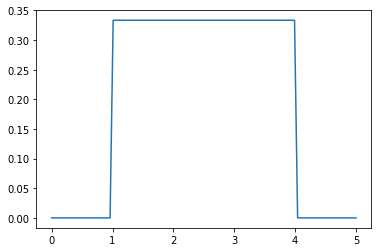

In [13]:
a = 1
b = 4

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [5]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = 100
sample_with_overshoot = np.append(sample,overshoot)
new_med = sorted(sample_with_overshoot)[25]
new_mean = sample_with_overshoot.mean()
print(med,mean,new_med,new_mean)
#Сильнее страдает матожидание

4.16754078023 4.51998004994 4.21987150016 6.35613427975 <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019289045828>


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [16]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#в этом случае среднее увеличится и умножится на константу С соответвтсвенно
mean = sample.mean()
mean_with_c = (sample+C).mean()
mean_mult_c = (C*sample).mean()
print(mean,mean_with_c,mean_mult_c)

1.92 2.42 0.96


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [30]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#при добавлении выбросов, рост дисперсии также будет экспоненциальным
overshoot = 34
sample_with_overshoot = np.append(sample,overshoot)
new_var = sample_with_overshoot.var()
print(var,new_var)

0.7336964872623081 16.940816882253063


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [31]:
#доверительный интервал всегда будет шире чем интерквантильный размах
import math
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
mean= sample.mean()
interq = (np.quantile(sample, 0.75) - np.quantile(sample, 0.25))
std = sqrt(sum([(i-mean)**2 for i in sample]) / (len(sample) - 1))
interv2 = (mean + std) - (mean - std)
print(interq)
print(interv2)
print(sample.mean())

AttributeError: module 'numpy' has no attribute 'quantile'

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [9]:
beta_rv = stats.beta(1,3)
#your code here
mean = beta_rv.mean()
mean

0.25

- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [8]:
gamma_rv = stats.gamma(2,2)

#your code here
mean = gamma_rv.mean()
var = gamma_rv.var()
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
print(mean,var,med)

4.0 2.0 3.60576668477


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [36]:
#нормальное распределение

#your code here
norm_rv = stats.norm(5,2)
means = np.array([])
for i in range(10000):
    sample = norm_rv.rvs(50)
    #your code here
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)


AttributeError: Unknown property density

In [ ]:
print(means.mean())
print(means.var())

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

In [ ]:
from random import randint

means = np.array([])
for i in range(10000):
    n = randint(0, 10)
    norm_rv = stats.norm(n,0.1)
    sample = norm_rv.rvs(20)
    #your code here
    means = np.append(means, sample.mean())
plt.hist(means, bins = 30,density = True)
plt.title('ЦПТ не выполняется при случайной генерации распределения')

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [14]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(100)
new_rv = np.array([(sample[i] - sample.mean())/sample.std() for i in range(len(sample))])#your code here
print(new_rv.mean())
print(new_rv.var())
#насколько я понимаю, абсолютного нуля здесь не достичь, т.к. происходят операции с типом float, но 15 нулей после запятой
#показываются нам искомое: среднее значение = 0 и дисперсия = 1

SyntaxError: invalid syntax (<ipython-input-14-c4f7d3de7078>, line 2)

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [28]:
#your code here
import math
def sss(k):
    summa = 0
    n = 0
    for i in k:
        summa += (i-k.mean())**2
        n+=1
    return summa/(n-1)
        
    

p = np.array([0.8,3.2,2])
mean = p.mean()

s = sss(p)
x_left = s*mean/6
x_right = s*mean/0.1


print(s,mean)
print(f"({x_left}, {x_right})")

1.44 2.0
(0.48000000000000004, 28.8)


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [30]:
#Рассмотрел с df = 14
d = np.array([128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
     111, 132, 149, 122, 139])
mean = d.mean()
s = sss(d)
x_leftnf = mean - 2.14*s/math.sqrt(15)
x_rightnf = mean + 2.14*s/math.sqrt(15)
print(f"({x_leftnf}, {x_rightnf})")
x_leftn = mean - 2.98*s/math.sqrt(15)
x_rightn = mean + 2.98*s/math.sqrt(15)
print(f"({x_leftn}, {x_rightn})")
#90% шире

(63.94023574493899, 197.79309758839435)
(37.670047906503825, 224.0632854268295)


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [38]:
norm_rv = stats.norm(0, 2)
#your code here

N1 = 10000
N2 = 20000
a = np.random.normal(0, 2, N1)
b = np.random.normal(0, 2, N2)
mean1, sigma1 = a.mean(), a.std()
mean2, sigma2 = b.mean(), b.std()
conf_int_a = stats.norm.interval(0.90, loc=mean1, scale=(sigma1/math.sqrt(N1)))
conf_int_b = stats.norm.interval(0.90, loc=mean2, scale=(sigma2/math.sqrt(N2)))
print(conf_int_a[1] - conf_int_a[0])
print(conf_int_b[1] - conf_int_b[0])

0.0656837418535
0.0463769041397


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#это ошибка второго рода

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [ ]:
#Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется 0,003. - нет
#Если бы в исследовании мы получили  p=0,9p=0,9 , это означало бы, что верна нулевая гипотеза. - просто не отвергаем гипотезу
#Чем меньше p уровень значимости, тем хуже гипотеза. - нет

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [ ]:
#Если совсем рисковано, то можно использовать 0.01
#Да

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

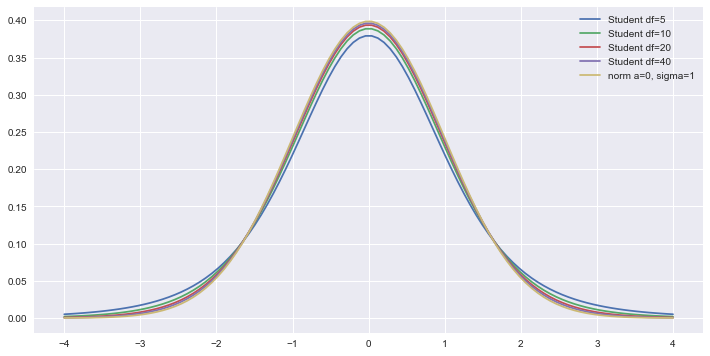

In [39]:
#чем больше степени свободы, тем ближе распределение Стьюдента к нормальному распределению
%matplotlib inline

t_rv_5 = stats.t(5)
t_rv_10 = stats.t(10)
t_rv_20 = stats.t(20)
t_rv_40 = stats.t(40)
norm_rv = stats.norm(0, 1)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf_5 = t_rv_5.pdf(x)
pdf_10 = t_rv_10.pdf(x)
pdf_20 = t_rv_20.pdf(x)
pdf_40 = t_rv_40.pdf(x)
pdf_norm = norm_rv.pdf(x)
plt.plot(x, pdf_5)
plt.plot(x, pdf_10)
plt.plot(x, pdf_20)
plt.plot(x, pdf_40)
plt.plot(x, pdf_norm)

plt.legend(['Student df=5', 'Student df=10', 'Student df=20','Student df=40','norm a=0, sigma=1'])

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


array([[ nan,  nan],
       [ nan,  nan]])

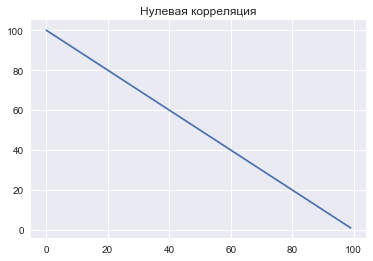

In [40]:
#your code here
a = []
b = []
ai = 0
bi = 100
for i in range(100):
    a.append(ai)
    ai +=1
for j in range(100):
    b.append(bi)
    bi -=1
plt.plot(a, b)
plt.title('Отрицательная корреляция с коэффициентом -1')
a = np.array([])
b = np.array([])
for i in range(100):
    np.append(a,4)

for j in range(100):
    np.append(b, 1)

plt.scatter(a, b)
plt.title('Нулевая корреляция')
np.corrcoef(a, b)

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

[[ 1.         -0.00247214]
 [-0.00247214  1.        ]]


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2995: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2929: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


array([[ nan,  nan],
       [ nan,  nan]])

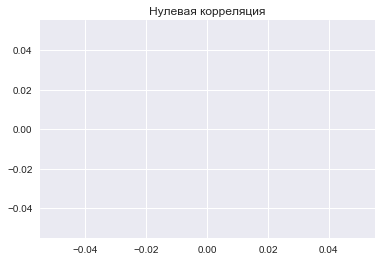

In [42]:
np.random.seed(1)

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 10000)

y = np.random.randint(0, 50, 10000)

print(np.corrcoef(x, y))
#your code here
a = np.array([])
b = np.array([])
for i in range(100):
    np.append(a,4)

for j in range(100):
    np.append(b, 1)

plt.scatter(a, b)
plt.title('Нулевая корреляция')
np.corrcoef(a, b)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [43]:

norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))

#your code here
a = list(zip(np.argsort(sample_1),sample_1))
b = list(zip(np.argsort(sample_2),sample_2))
ab = list(zip(np.argsort(sample),sample))
sum_a = sum_b = sum_ab =0
for elem in ab:
    if elem[1] in list(sample_1):
        sum_a += elem[0]
    else:
        sum_b += elem[0]

print(sum_a)
print(sum_b)

print(sum(np.argsort(sample)))

10817
9083
19900
